In [2]:
import numpy as np
import pandas as pd

# Loading Data
### Since the size of data is 185 million we are reading it in chunks

In [3]:
chunk_size = 10000  # Adjust the chunk size based on available memory
chunks = []
for chunk in pd.read_csv('train.csv', chunksize=chunk_size):
    # Process each chunk as needed
    chunks.append(chunk)

# After processing all chunks, you can concatenate them if necessary
data = pd.concat(chunks, axis=0)

In [4]:
data.shape

(184903890, 8)

# Data Cleaning

### Row Engineering - To handle Data Imbalance

In [2]:
import pandas as pd
import numpy as np

# Specify the chunk size
chunk_size = 10000

# Initialize an empty list to store processed chunks
balanced_chunks = []

# Read and process each chunk
for chunk in pd.read_csv('train.csv', chunksize=chunk_size):
    # Process each chunk as needed

    # Specify the target variable name
    target_variable = 'is_attributed'

    # Count of fraudulent records in the current chunk
    fraudulent_count = chunk[target_variable].sum()

    # Get non-fraudulent indices
    non_fraudulent_indices = chunk[chunk[target_variable] == 0].index

    # Randomly sample a subset of non-fraudulent indices
    sampled_non_fraudulent_indices = np.random.choice(non_fraudulent_indices, size=int(1.6 * fraudulent_count), replace=False)

    # Combine fraudulent and non-fraudulent data for the current chunk
    balanced_chunk = pd.concat([chunk[chunk[target_variable] == 1], chunk.loc[sampled_non_fraudulent_indices]])

    # Shuffle the combined data for the current chunk
    balanced_chunk = balanced_chunk.sample(frac=1).reset_index(drop=True)

    # Append the balanced chunk to the list
    balanced_chunks.append(balanced_chunk)

# Concatenate the balanced chunks along the rows (axis=0)
balanced_data = pd.concat(balanced_chunks, axis=0, ignore_index=True)


In [3]:
balanced_data.shape

(1180387, 8)

### Missing values handling

In [4]:
missing_values = balanced_data.isnull().sum()
missing_values

ip                      0
app                     0
device                  0
os                      0
channel                 0
click_time              0
attributed_time    723541
is_attributed           0
dtype: int64

### Removing unwanted columns

In [5]:
balanced_data = balanced_data.drop(['attributed_time'], axis=1)

In [6]:
missing_values = balanced_data.isnull().sum()
missing_values

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

### Dropping Duplicates

In [7]:
balanced_data = balanced_data.drop_duplicates()

In [8]:
balanced_data.shape

(1180061, 7)

### Datatype checking

In [50]:
balanced_data.dtypes

ip                        int64
app                       int64
device                    int64
os                        int64
channel                   int64
click_time       datetime64[ns]
is_attributed             int64
hour                      int64
dtype: object

# Exploratory Data Analysis (EDA)

In [44]:
import pandas as pd

# Calculate the value counts for the 'ip' column
ip_counts = balanced_data['ip'].value_counts()

# Convert to DataFrame for a tabular view
ip_counts_table = ip_counts.reset_index()
ip_counts_table.columns = ['IP', 'Count']

# Display the table
print(ip_counts_table)


            IP  Count
0         5348   6998
1         5314   6594
2        73487   3956
3        73516   3818
4        53454   2127
...        ...    ...
255303  277692      1
255304  238874      1
255305  233720      1
255306  220679      1
255307  331467      1

[255308 rows x 2 columns]


In [47]:
import pandas as pd

# Calculate the value counts for the 'app' column
app_counts = balanced_data['app'].value_counts()

# Convert to DataFrame for a tabular view
app_counts_table = app_counts.reset_index()
app_counts_table.columns = ['App ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(app_counts_table)


     App ID   Count
0         3  144624
1        19  135543
2        12   97548
3         2   90933
4         9   82092
5        18   69237
6        15   65184
7        35   64199
8        29   42397
9        14   42041
10       10   37131
11        5   28640
12        1   23922
13        8   21160
14       11   18902
15       13   17903
16       45   16580
17       21   14644
18       26   13836
19       72   11499
20       23   10720
21       20   10500
22        6    9755
23        7    8348
24       64    8074
25       27    7356
26       25    5794
27       28    5433
28       24    5328
29       39    5276
30       66    4231
31       17    3487
32       32    3131
33       22    2898
34       84    2797
35       83    2490
36       37    2202
37       62    2188
38      107    2187
39       50    1792
40       96    1737
41      108    1622
42       55    1568
43       79    1438
44       36    1403
45       43    1366
46       34    1156
47      150    1142
48      115    1136


In [48]:
import pandas as pd

# Calculate the value counts for the 'device' column
device_counts = balanced_data['device'].value_counts()

# Convert to DataFrame for a tabular view
device_counts_table = device_counts.reset_index()
device_counts_table.columns = ['Device ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(device_counts_table)


      Device ID   Count
0             1  989320
1             0  105499
2             2   33416
3             6    2984
4          3032    2867
5            40    2646
6            16    2228
7            18    1499
8            21    1169
9            33    1116
10         3543     975
11           30     819
12           67     819
13           88     752
14          114     726
15         3866     707
16           37     680
17          154     664
18          109     619
19            7     617
20           78     602
21           50     588
22           97     491
23           46     479
24           82     433
25           60     425
26          211     407
27           56     353
28          136     341
29          299     338
30          220     336
31           96     326
32            4     321
33           76     315
34           25     309
35          101     304
36          343     296
37          203     294
38          137     267
39            9     265
40           20 

In [49]:
import pandas as pd

# Calculate the value counts for the 'os' column
os_counts = balanced_data['os'].value_counts()

# Convert to DataFrame for a tabular view
os_counts_table = os_counts.reset_index()
os_counts_table.columns = ['OS ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(os_counts_table)


     OS ID   Count
0       19  252587
1       13  217834
2       17   49084
3       24   48720
4       18   46573
5       22   42232
6        0   39380
7       10   26976
8        8   26213
9        6   23564
10      15   21755
11      25   21161
12      20   20722
13       9   20289
14      29   19870
15      37   19609
16      21   19572
17      16   16365
18       3   13751
19      14   13609
20      32   13474
21      27   13170
22      38   12627
23      41   11679
24      47   11573
25      11   11394
26       1   10966
27      30   10528
28      12    9386
29      36    8471
30      23    8393
31      35    8036
32       4    8012
33      43    7094
34      50    6832
35      28    6653
36       7    6340
37      53    5719
38      61    5570
39      26    4751
40      40    4388
41      31    3965
42     607    3800
43      49    3528
44       2    2910
45     748    1829
46      42    1724
47     866    1624
48      34    1507
49      46    1370
50      59    1268
51      58  

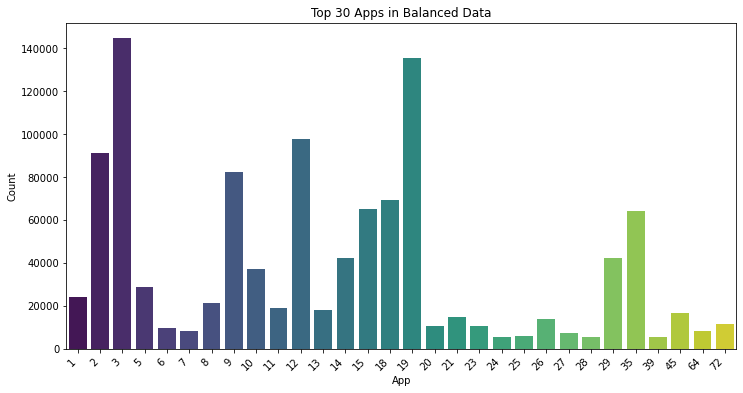

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 30 values for the 'app' column
top_apps = balanced_data['app'].value_counts().nlargest(30)

# Set the figure size
plt.figure(figsize=(12, 6))

# Use Seaborn for better visualization
sns.barplot(x=top_apps.index, y=top_apps, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('App')
plt.ylabel('Count')
plt.title('Top 30 Apps in Balanced Data')

# Show the plot
plt.show()


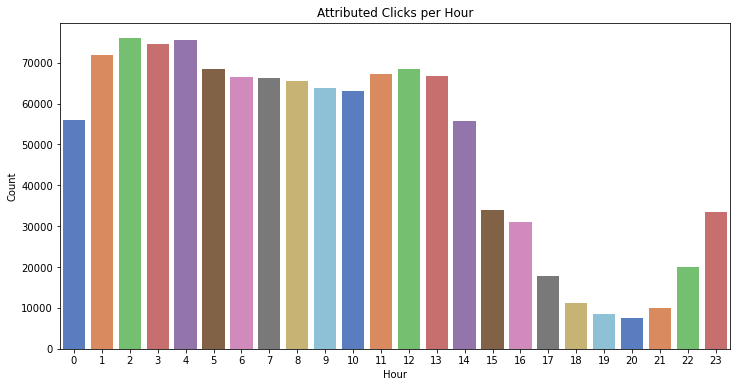

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'click_time' to datetime
balanced_data['click_time'] = pd.to_datetime(balanced_data['click_time'])

# Extract the hour from 'click_time'
balanced_data['hour'] = balanced_data['click_time'].dt.hour

# Get the unique hours and sort them
sorted_hours = sorted(balanced_data['hour'].unique())

# Plotting for attributed clicks per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=balanced_data, palette='muted', order=sorted_hours)
plt.title('Attributed Clicks per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


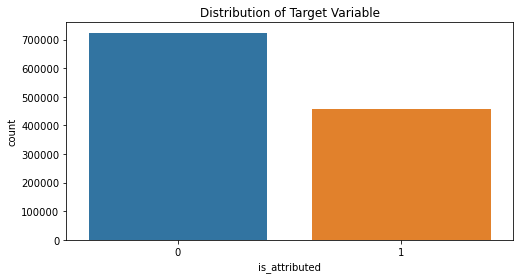

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x='is_attributed', data=balanced_data)
plt.title('Distribution of Target Variable')
plt.show()

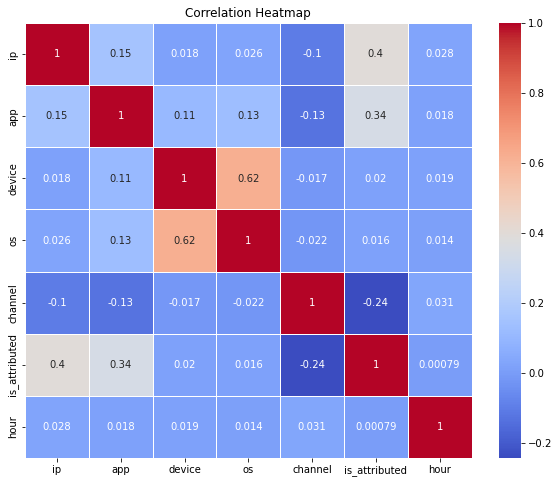

In [12]:
correlation_matrix = balanced_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

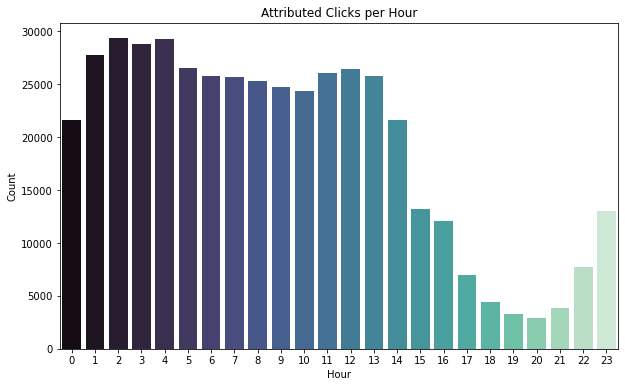

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Plotting for attributed clicks per hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=attributed_data, palette='mako')
plt.title('Attributed Clicks per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


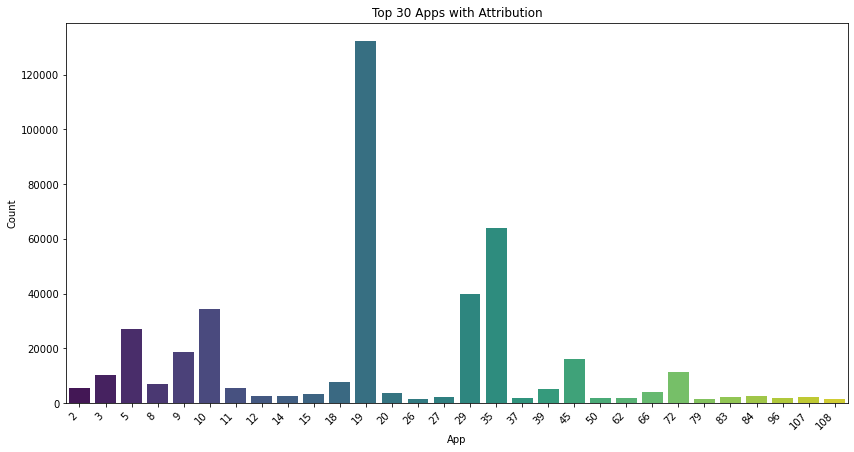

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Get the top 30 apps
top_apps_attributed = attributed_data['app'].value_counts().nlargest(30)

# Set the figure size
plt.figure(figsize=(14, 7))

# Use Seaborn for better visualization
sns.barplot(x=top_apps_attributed.index, y=top_apps_attributed, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('App')
plt.ylabel('Count')
plt.title('Top 30 Apps with Attribution')

# Show the plot
plt.show()


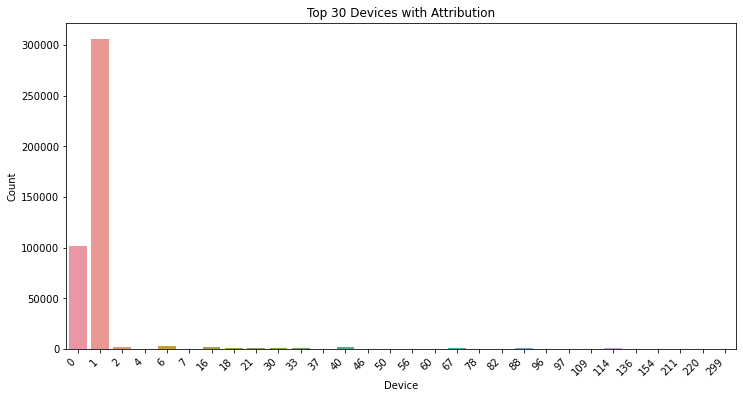

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'balanced_data' is your DataFrame

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Get the top 30 devices and OS
top_devices_attributed = attributed_data['device'].value_counts().nlargest(30)
top_os_attributed = attributed_data['os'].value_counts().nlargest(30)

# Plotting for top devices
plt.figure(figsize=(12, 6))
sns.barplot(x=top_devices_attributed.index, y=top_devices_attributed)
plt.title('Top 30 Devices with Attribution')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


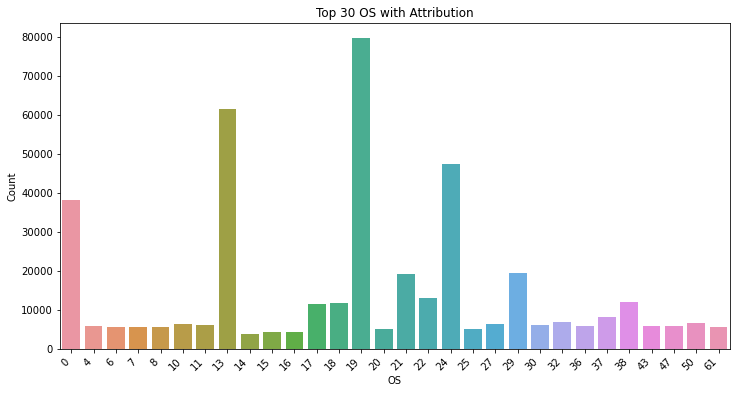

In [28]:
# Plotting for top OS
plt.figure(figsize=(12, 6))
sns.barplot(x=top_os_attributed.index, y=top_os_attributed)
plt.title('Top 30 OS with Attribution')
plt.xlabel('OS')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


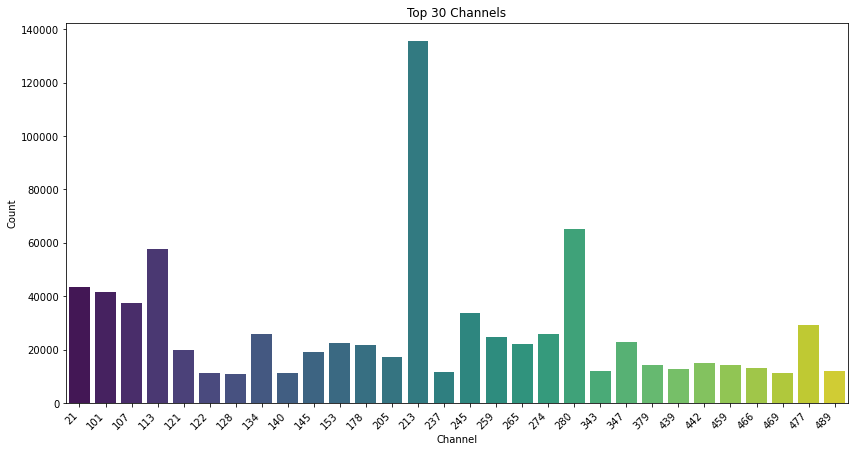

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Calculate the number of clicks per channel
clicks_per_channel = balanced_data['channel'].value_counts()

# Get the top 30 channels
top_channels = clicks_per_channel.nlargest(30)

# Plotting for clicks per channel
plt.figure(figsize=(14, 7))
sns.barplot(x=top_channels.index, y=top_channels, palette='viridis')
plt.title('Top 30 Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



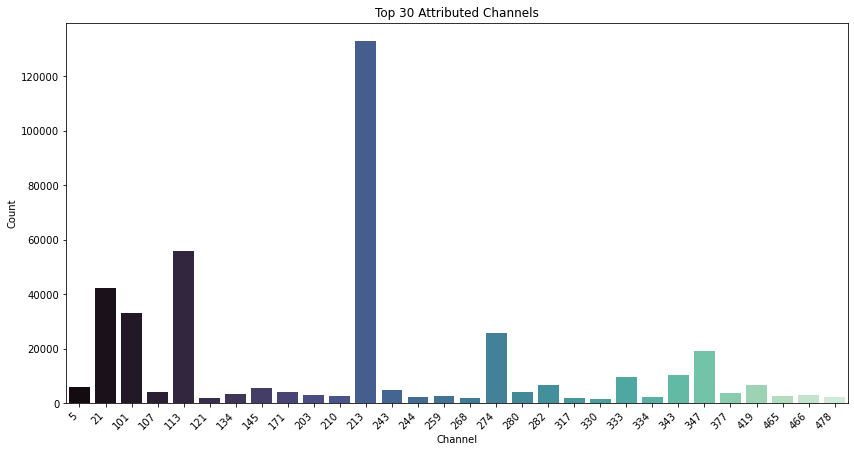

In [34]:
# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Calculate the number of attributed clicks per channel
attributed_clicks_per_channel = attributed_data['channel'].value_counts()

# Get the top 30 attributed channels
top_attributed_channels = attributed_clicks_per_channel.nlargest(30)

# Plotting for top attributed channels
plt.figure(figsize=(14, 7))
sns.barplot(x=top_attributed_channels.index, y=top_attributed_channels, palette='mako')
plt.title('Top 30 Attributed Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


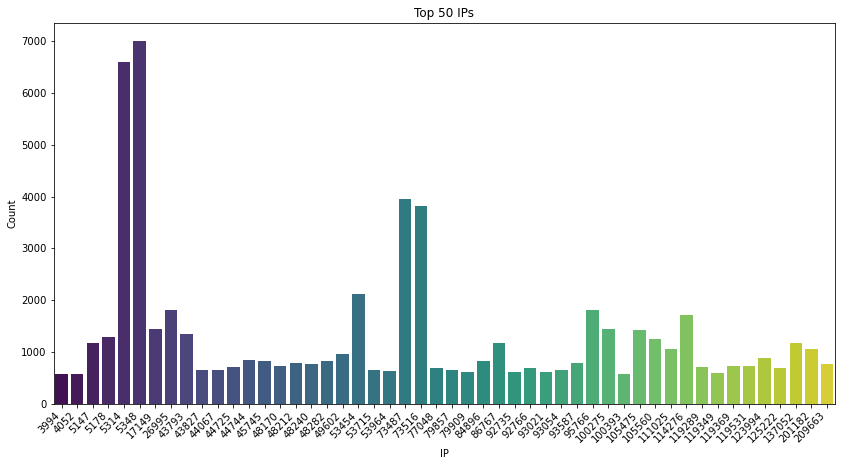

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of clicks per IP
clicks_per_ip = balanced_data['ip'].value_counts()

# Get the top 50 IPs
top_ips = clicks_per_ip.nlargest(50)

# Plotting for top 50 IPs
plt.figure(figsize=(14, 7))
sns.barplot(x=top_ips.index, y=top_ips, palette='viridis')
plt.title('Top 50 IPs')
plt.xlabel('IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


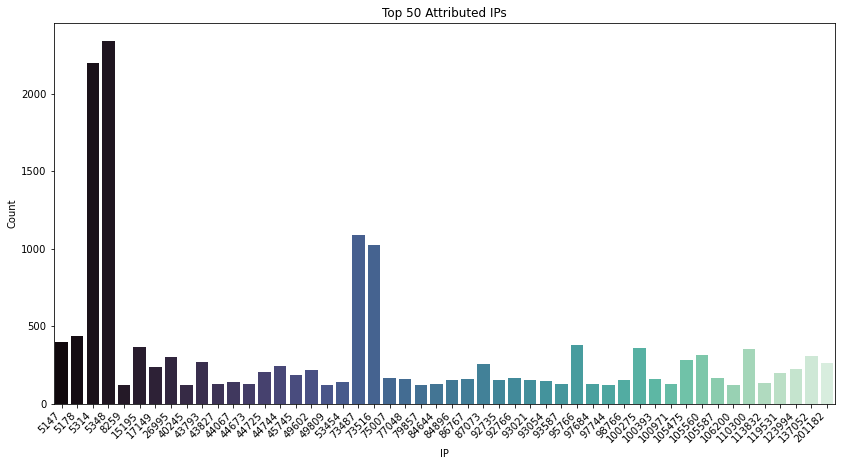

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Calculate the number of attributed clicks per IP
attributed_clicks_per_ip = attributed_data['ip'].value_counts()

# Get the top 50 attributed IPs
top_attributed_ips = attributed_clicks_per_ip.nlargest(50)

# Plotting for top 50 attributed IPs
plt.figure(figsize=(14, 7))
sns.barplot(x=top_attributed_ips.index, y=top_attributed_ips, palette='mako')
plt.title('Top 50 Attributed IPs')
plt.xlabel('IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
